<a href="https://colab.research.google.com/github/AliveBeing/MNIST-Digit-Classification-with-TensorFlow-and-Keras/blob/main/Neural_network_for_handwritten_letters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train,y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
len(X_train)

60000

In [7]:
len(X_test)

10000

In [24]:
X_train = X_train/255
X_test = X_test/255

In [25]:
X_train[0].shape

(28, 28)

In [26]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

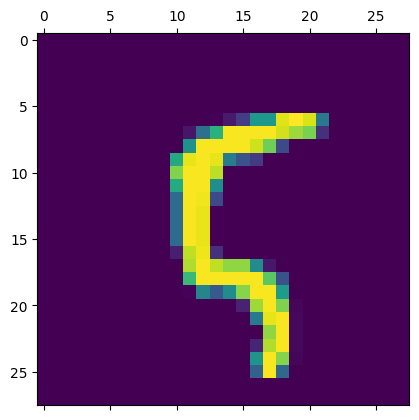

In [27]:
plt.matshow(X_train[100])

In [28]:
y_train[100]

5

In [29]:
X_train.shape


(60000, 28, 28)

In [30]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [31]:
X_train_flattened.shape


(60000, 784)

In [32]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy' ,
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4719 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3033 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2833 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2728 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2669 - accuracy: 0.9256


In [33]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2681 - accuracy: 0.9257


[0.26808401942253113, 0.9257000088691711]

In [34]:
y_predicted= model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 1ms/step


array([1.8454369e-02, 1.9610687e-07, 4.8504882e-02, 9.3699789e-01,
       2.0872115e-03, 8.6820647e-02, 1.8593707e-06, 9.9982655e-01,
       7.8717180e-02, 5.7040858e-01], dtype=float32)

In [35]:
np.argmax(y_predicted[0])

7

In [36]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [37]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    5,    7,    2,    2,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   5,    9,  920,   16,    7,    5,   14,   12,   41,    3],
       [   4,    0,   18,  914,    0,   27,    4,   14,   23,    6],
       [   1,    1,    2,    1,  916,    0,   16,    5,   10,   30],
       [  11,    3,    2,   31,   10,  768,   20,    9,   31,    7],
       [   8,    3,    3,    1,    7,    8,  925,    2,    1,    0],
       [   1,    5,   23,    3,    6,    0,    0,  966,    3,   21],
       [   6,    6,    6,   20,    9,   22,   10,   13,  876,    6],
       [  10,    7,    1,   10,   30,    8,    1,   36,    5,  901]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

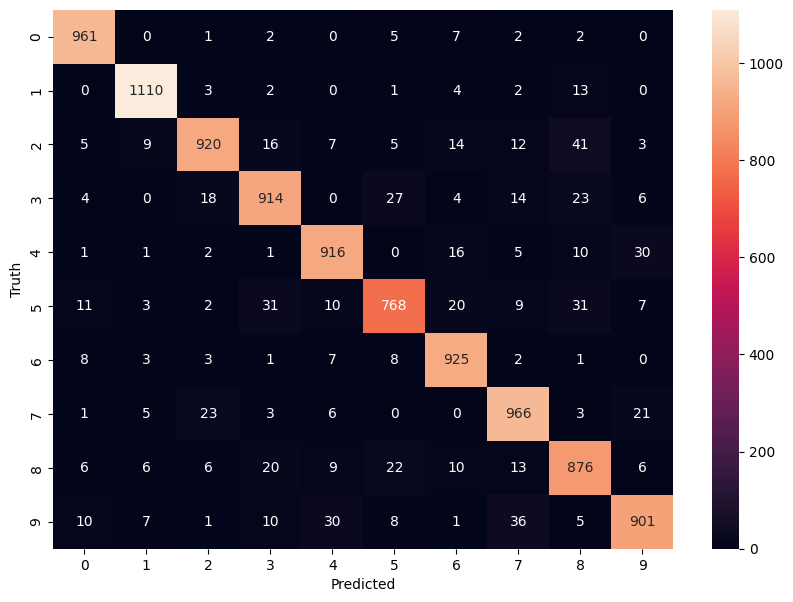

In [38]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [39]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy' ,
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2734 - accuracy: 0.9221
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1262 - accuracy: 0.9626
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0891 - accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0686 - accuracy: 0.9789
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0541 - accuracy: 0.9836


In [40]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0790 - accuracy: 0.9751


[0.07904794067144394, 0.9750999808311462]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

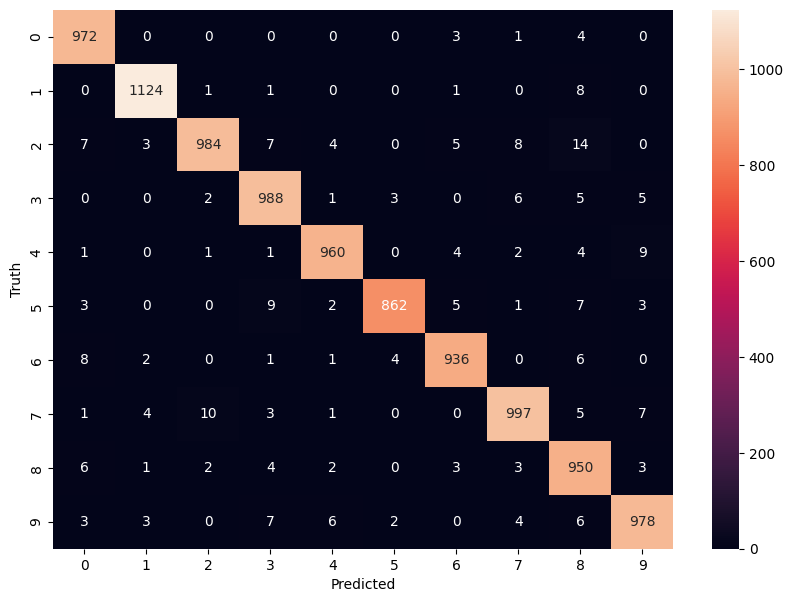

In [41]:
y_predicted= model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')